## PROJECT: Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#regression)


<a id='intro'></a>
### Introduction

This project focuses on understanding of the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who __"convert"__, meaning the number of users who __decide to pay for the company's product__. The goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [779]:
# Import of libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in df. 
a. Read in the dataset and take a look at the top few rows here.

In [780]:
# Read in the dataset and take a look at the top rows
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [781]:
# Number of rows in the dataset
number_rows=df.shape[0]
number_rows

294478

c. The number of unique users in the dataset.

In [782]:
# Number of unique users
unique_users=df['user_id'].nunique()
unique_users


290584

d. The proportion of users converted.

In [783]:
# Proportion of users converted
proportion_converted_users=df['converted'].mean()
proportion_converted_users

0.11965919355605512


e. The number of times the new_page and treatment don't line up.

In [784]:
# The number of times the 'new_page' and 'treatment' don't line up

# Not match- part 1
df_a=df.query('group=="treatment" and landing_page!="new_page"')
rows_1=df_1.shape[0]
rows_1

1965

In [785]:
# Not match- part 2
df_b=df.query('landing_page=="new_page" and group!="treatment"')
rows_2=df_2.shape[0]
rows_2

1928

In [786]:
# Number of times new_page and treatment do not match
new_page_treatment_notmatched=rows_1+rows_2
new_page_treatment_notmatched

3893

f. Do any of the rows have missing values?

In [787]:
# Review of missing valuse
missing_values=df.info()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. 


In [788]:
# Print current dataset we are working with
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [789]:
# We need to remove rows where 'treatment' is not aligned with 'new_page' and 'control' is not aligned with 'old_page' as we may not be sure
# if this row truly received the new or old page

# Create sub-datasets with data filtered as requested above
df_a=df.query('group=="treatment" and landing_page!="new_page"')
df_b=df.query('landing_page=="new_page" and group!="treatment"')
df_c=df.query('group=="control" and landing_page!="old_page"')
df_d=df.query('landing_page=="old_page" and group!="control"')
df_remove=df_a+df_b+df_c+df_d
df_remove=df_remove.index

In [790]:
# Drop filtered data from above and create new dataset - df2
df2=df.drop(df_remove, axis=0)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [791]:
# Double Check all of the correct rows were removed - final count is 0, as expected
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` a. How many unique user_ids are in df2?

In [792]:
# Number of unique user_id in newly created dataset df2
df2['user_id'].nunique()

290584

b. There is one user_id repeated in df2.  What is it?

In [793]:
# Check for duplicity
duplicated_row=df2['user_id'].duplicated()
filter_duplicated_row=df2.loc[duplicated_row, :]
filter_duplicated_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat user_id? 

In [794]:
# Close look to duplicated row
filter_duplicated_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

In [795]:
# Check for number of rows in dataset
df2.shape[0]

290585

In [796]:
# Drop duplicates
filter_duplicated_row=filter_duplicated_row.index
df2=df2.drop(filter_duplicated_row, axis=0)

In [797]:
# Check for number of rows in datase
size=df2.shape[0]
size

290584

In [798]:
# Number of unique user_id in df2
df2['user_id'].nunique()

290584

`4.` a. What is the probability of an individual converting regardless of the page they receive?

In [799]:
# Check the sample rows in dataset df2
df2.sample(5)

,user_id,timestamp,group,landing_page,converted
250538,762103,2017-01-06 13:10:22.708482,control,old_page,1
217423,832208,2017-01-13 23:52:20.510666,treatment,new_page,0
126592,801474,2017-01-16 15:13:09.938718,control,old_page,0
102886,752196,2017-01-18 13:40:56.442278,control,old_page,0
51214,875261,2017-01-24 11:55:39.207642,treatment,new_page,0


In [800]:
# Probability of an individual converting regardless of the page they receive

conversion=df2['converted'].value_counts()
conversion[1]
probability_conversion=conversion[1]/size
probability_conversion

0.11959708724499628

b. Given that an individual was in the control group, what is the probability they converted?

In [801]:
# Assume that individual was in 'control' group
# Calculation of the probability of their conversion

# Check the group size of those who converted
control_group=df2.query('group=="control"')
control_group_size=control_group['converted'].value_counts()
control_group_size

0    127785
1     17489
Name: converted, dtype: int64

In [802]:
# Filter 'control' group  and only those who 'converted'
control_group_total=control_group_size[0]+control_group_size[1]
control_group_total

145274

In [803]:
probability_controlgroup=control_group_size[1]/control_group_total  # Total probability calculated
probability_controlgroup

0.1203863045004612

c. Given that an individual was in the treatment group, what is the probability they converted?

In [804]:
# Assume that individual was in 'treatment' group
# Calculation of the probability of their conversion

# Check the group size of those who converted
treatment_group=df2.query('group=="treatment"')
treatment_group_size=treatment_group['converted'].value_counts()
treatment_group_size

0    128046
1     17264
Name: converted, dtype: int64

In [805]:
# Filter 'control' group  and only those who 'converted'
treatment_group_total=treatment_group_size[0]+treatment_group_size[1]
treatment_group_total

145310

In [806]:
# Total probability calculated
probability_treatmentgroup=treatment_group_size[1]/treatment_group_total
probability_treatmentgroup

0.11880806551510564

d. What is the probability that an individual received the new page?

In [807]:
# The probability that an individual received the new page

# Proportion of new page calculated
proportions=df2['landing_page'].value_counts()
proportions

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [808]:
# Probability calculated
probability_new_page=proportions[0]/(proportions[0]+proportions[1])
probability_new_page

0.5000619442226688

__CONCLUSION:__

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

__Answer:__ Probability of the conversion regardless of the page individuals received is 11.59%. Probability of the conversion in control group is 12.09%.
Probability of the conversion in treatment group is 11.88%. The probability of individual received the new page is 50%.
The results may be distorted by Simpson's paradox as we calculate results based on groups only. The final result of 50% probability is not very helpful in decision making process. Such results are too simple and dive not deep enough to make decision.

<a id='ab_test'></a>
### Part II - A/B Test

Hypothesis testing helps the business to make better and more informed database decision, which starts with transformation of questions to two hypothesis H0 (null) and H1 (alternative). Results are then used to judge which version is effective more than other.

The plenty of questions may arise for eg:
###### (1) Due to the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed;
###### (2) hard question is if we stop as soon as one page is considered significantly better than another or if it needs to happen consistently for a certain amount of time;
###### (3)  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

__Null hypothesis:__ Conversion rate for new page is no better or even worse than conversion rate for old page.

**$p_{new}$** <= **$p_{old}$**

__Alternative hypothesis:__ Conversion rate for new page is better than convesrion rate for old page.

**$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>
Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>
Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>



In [809]:
# Check the dataset
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **convert rate** for $p_{new}$ under the null? 

In [810]:
# Here we are looking at the null where there is no difference in conversion based on the page,
# which means the conversions for each page are the same.

In [811]:
# Convert rate for P-new under the null
cr_new=df2['converted'].mean()
cr_new

0.11959708724499628



b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [812]:
# Here we are looking at the null where there is no difference in conversion based on the page,
# which means the conversions for each page are the same.

In [813]:
# Convert rate for P-old under the null
cr_old=df2['converted'].mean()
cr_old

0.11959708724499628

c. What is $n_{new}$?

In [814]:
# Set n-new
page_new_count


145310

d. What is $n_{old}$?

In [815]:
# Set n-old
page_old_count

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [816]:
# Sample size for n-new transaction with a convert rate of p-new
new_page_converted=np.random.choice([0, 1], size=page_new_count, p=[(1-cr_new), cr_new])
new_page_converted.mean()


0.1198541050168605

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [817]:
# Sample size for n-old transaction with a convert rate p-old
old_page_converted=np.random.choice([0, 1], size=page_old_count, p=[(1-cr_old), cr_old])
old_page_converted.mean()

0.12044825639825434

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [818]:
# Set the difference of p-new and p-old for simulated values
diff=new_page_converted.mean()-old_page_converted.mean()
diff

-0.0005941513813938343

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [819]:
# Simulation of sampling distribution for difference in p-
p_diffs=[]

for x in range(10000):
    old_page_converted=(np.random.choice([0, 1], size=page_old_count, p=[(1-cr_old), cr_old])).mean()
    new_page_converted=(np.random.choice([0, 1], size=page_new_count, p=[(1-cr_new), cr_new])).mean()
    p_diffs.append(new_page_converted-old_page_converted)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [820]:
# Make an array
p_diffs=np.array(p_diffs)


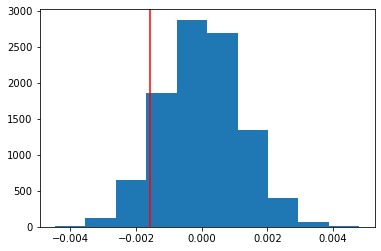

In [821]:
# Plot the histogram
observed_difference=probability_treatmentgroup-probability_controlgroup
plt.hist(p_diffs)
plt.axvline(x=observed_difference, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [822]:
#Computation of p-value by finding the proportion of values in the sampling distribution and observed difference
(p_diffs>observed_difference).mean()

0.9066

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

__Answer:__ In part j. above, I computed p-value by finding the proportion of values in the sample distribution that is greater than our observed difference. Computed p-value is used to determine statistical significance for our observed difference.
P-value is higher than 0.05, it seems that there is no statistically significant relationship,  we failed to reject null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [823]:
# Check the dataset
df2.sample(5)

,user_id,timestamp,group,landing_page,converted
292027,697891,2017-01-09 00:11:49.208241,treatment,new_page,0
223904,873458,2017-01-10 03:41:40.554469,treatment,new_page,0
184507,750076,2017-01-10 11:29:44.945315,control,old_page,0
124054,632857,2017-01-19 21:02:15.770639,treatment,new_page,0
6533,724851,2017-01-07 18:25:37.374149,control,old_page,0


In [824]:
# Import statmodel and fill in cell with built-in
import statsmodels.api as sm

convert_old = df2.query('group=="control" and converted==1')['converted'].count()
convert_new = df2.query('group=="treatment" and converted==1')['converted'].count()
n_old = page_old_count
n_new = page_new_count

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [825]:
from statsmodels.stats.proportion import proportions_ztest

In [826]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

__Answer:__ A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units. The z-score is negative as its value lies below the mean. It is 1.3 standard deviations below mean.

A p-value is quite large resulting in no statistical relationship between variables. We failed to reject null hypothesis. The conclusion is i line with conclusion in j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

__Answer:__ As there are only two options possible, we will use Logistic regression.

b. The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [827]:
# Check the dataset
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [828]:
# Add intercept column
df2['intercept']=1

In [829]:
# Add dummies
df2[['ab_page', 'old_page']]=pd.get_dummies(df2['landing_page'])
df2=df2.drop('old_page', axis=1)
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use statsmodels to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part b. to predict whether or not an individual converts.

In [830]:
# Logistic regression function
log_mod=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results=log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [831]:
# Summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:07:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

__Answer:__ P-value associated with ab_page is 0.190, concluding that there is no statistically significant relationship between variable and response variable as p-value is above alpha=0.05. We may conclude that we fail to reject null hypothesis.
P-value calculated in Part II is 0.9. The value is still above alpha=0.05 and we may concluded that we fail to reject null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

__Answer:__ There might be plenty of other factors which have positive impact on the user influencing him/her to convert, e.g. atractivity of product, recomendations of product, appraisal of product, time for decision, discounts, etc. The Company should evaluate which factors may have most impact and add to model, however too many factors included may result in another problem called multicollinearity.Multicollinearity occurs when the model includes multiple factors that are correlated not just to the response variable, but also to each other. In other words, it results when the model has factors that are a bit redundant.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [832]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [833]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [834]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [835]:
# We need to create dummies for country (US-baseline, dropp, UK, CA) and intercept (already created above)
df_new[['CA', 'UK', 'US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [836]:
log=sm.Logit(df_new['converted'], df_new[['intercept','UK', 'CA']])
results=log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:               1.521e-05
Time:                        21:07:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

__Answer:__ Both p-values are over alpha=0.05 therefore we assume there is no statistically significant relationship. 
            As p-value si higher than alpha we stay with H0 (failed to reject H0).

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [837]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [838]:
# We will look at an interaction between country (US-baseline, UK, CA) and page(ab_page)
df_new['uk_page']=df_new['UK']*df_new['ab_page']
df_new['ca_page']=df_new['CA']*df_new['ab_page']

In [839]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,uk_page,ca_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [840]:
### Fit Your Linear Model And Obtain the Results
log=sm.Logit(df_new['converted'], df_new[['intercept','UK', 'CA', 'ab_page','uk_page', 'ca_page']])
results=log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:07:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
uk_page        0.0314      0.027      1.181      0.238      -0.021       0.084
ca_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

__Answer:__ All p-values are over alpha=0.05, therefore we assume that there is no statistically significat relationship and we failed to reject H0.

<a id='conclusions'></a>
## Conclusions




Probability in Part I gives us too general information which could be a bit risky for business to rely on only. The results may be distorted by Simpson's paradox as we calculate results based on groups only. The final result of 50% probability is not very helpful in decision making process. Such results are too simple and dive not deep enough to make decision.

A/B test results evaluation in Part II. shows that as a result of hypothesis setting and testing, p-value is higher comparing to alpha. This tells us that there is no statistically significant influence and we fail to reject null hypothesis. As a result,  business would probably not use new webpage. Using this technique might have its drawbacks, as we did evaluate only factor related to old and new page. However there are plenty of other factors which might influence user in purchase decision (time for decision, time take to test groups, discounts, attractivity of product, etc.).


Results from regression in Part III. supports the results in Part II., however p-value even though it is still higher than alpha 0.05, it is much lower than in p-value calculation in Part II. Results supports that there is no statistically significant relationship and we fail to reject null hypothesis. All in all, the Company should evaluate also other factors and add it to the model in order to have better understaning what may impact the decision to convert. However, this may bring also the problem with multicillinearity, which could be reduced through carefull review of other possible factors.



Resources:
[Minitab](https://blog.minitab.com/en/understanding-statistics/handling-multicollinearity-in-regression-analysis)
[Simplypsychology](https://www.simplypsychology.org/z-score.html)
[Sonolake](https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/)